Group 6
* Authors: Albert Zeng, Eleanor Ma, Sharifa Esfandiari
* Submission date: October 12, 2023

# P1: Obesity Prediction

## Objective

The objective of this machine learning project is to develop a predictive model for classifying individuals into specific weight categories based on their physical characteristics and health-related attributes. The dataset used for this analysis includes information about individuals' age, height, weight, family history, and other factors that can contribute to weight-related health issues. The primary goal is to create a machine learning model that can accurately categorize individuals into two weight classes, normal or overweight/obese, to assist in health assessment and risk prediction.

**Business Problem Definition:**  
Business Context: The primary goal is to create a predictive model that can accurately categorize individuals into different weight classes based on their attributes.  
Constraints: The project constraints include the availability of labeled data, model interpretability, and the need for models that generalize well to unseen data.

**Data Preprocessing:**<br>
Data Cleaning: Identify and handle missing values, outliers, and anomalies to ensure data quality and reliability.<br>
Data Transformation: Prepare the data for analysis by performing necessary transformations, scaling, and encoding categorical variables.

**Exploratory Data Analysis (EDA):**<br>
Explore the dataset visually and statistically to gain insights into the distribution, relationships, and patterns within the data.<br>
Identify potential correlations between features and weight categories.<br>

**Feature Selection/Engineering:**<br>
Select relevant features that contribute significantly to weight classification.<br>
Engineer new features if necessary to enhance model predictive power based on insights gained during EDA.

**Model Selection:**<br>
Choose appropriate machine learning algorithms for weight classification, such as Logistic Regression, K-Nearest Neighbors, and Random Forest, considering the dataset's characteristics.<br>

**Model Training & Hyperparameter Tuning:**<br>
Train the selected models using the dataset and optimize hyperparameters to improve model performance.<br>
Employ cross-validation to assess model robustness and generalization.<br>

**Pattern Discovery:**<br>
Apply data mining techniques to discover valuable patterns, trends, and relationships within the dataset.<br>
Identify key factors influencing weight classification based on the developed models.<br>

**Model Evaluation:**<br>
Assess model performance using various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.<br>
Analyze ROC-AUC curves and precision-recall curves to understand model behavior and trade-offs.<br>

**Interpretation and Application:**<br>
Interpret the results of the analysis to gain insights into the factors contributing to weight classification.<br>
Utilize these insights to make informed decisions related to health assessment and weight management.<br>


## Data Source

Data downloaded from UCI:<br>
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition <br>
The dataset comprised 2111 rows and 17 columns with various features related to obesity characteristics, and other relevant information about the sample person.

The dataset contains the following information:

Gender - The gender of the individual (e.g., Male or Female).  
Age - The age of the individual.  
Height - The height of the individual in meters.  
Weight - The weight of the individual in kilograms.  
family_history_with_overweight - Indicates whether there is a family history of overweight (e.g., yes or no).  
FAVC (Frequent Consumption of High-Caloric Food) - Indicates whether the individual frequently consumes high-caloric food (e.g., yes or no).  
FCVC (Frequency of Consumption of Vegetables) - Indicates the frequency of consuming vegetables on a scale.  
NCP (Number of Main Meals per Day) - Indicates the number of main meals the individual consumes per day.  
CAEC (Consumption of Food Between Meals) - Indicates the consumption of food between meals (e.g., Always, Frequently, Sometimes, or No).  
SMOKE - Indicates whether the individual smokes (e.g., yes or no).  
CH2O (Consumption of Water Daily) - Indicates the daily consumption of water.  
SCC (Calories Consumption Monitoring) - Indicates whether the individual monitors calorie consumption (e.g., yes or no).  
FAF (Physical Activity Frequency) - Indicates the frequency of physical activity.  
TUE (Time Using Technology Devices) - Indicates the time spent using technology devices.  
CALC (Calories Monitoring Technology Devices) - Indicates the use of technology devices for monitoring calories (e.g., Always, Frequently, Sometimes, or No).  
MTRANS (Mode of Transportation) - Indicates the mode of transportation used by the individual (e.g., Walking, Public Transportation, etc.).  
NObeyesdad (Obesity Level) - Indicates the obesity level of the individual, which is the target variable you might want to predict or analyze.

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
seed = 0

In [622]:
df0 = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df0.shape

(2111, 17)

In [492]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df0.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [6]:
df0.describe(include='object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


In [493]:
for col in df0.select_dtypes('object').columns:
    print(f"{col} : {df0[col].nunique()} unique values")
    print(df0[col].value_counts())
    print("="*30)

Gender : 2 unique values
Male      1068
Female    1043
Name: Gender, dtype: int64
family_history_with_overweight : 2 unique values
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
FAVC : 2 unique values
yes    1866
no      245
Name: FAVC, dtype: int64
CAEC : 4 unique values
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
SMOKE : 2 unique values
no     2067
yes      44
Name: SMOKE, dtype: int64
SCC : 2 unique values
no     2015
yes      96
Name: SCC, dtype: int64
CALC : 4 unique values
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
MTRANS : 5 unique values
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
NObeyesdad : 7 unique values
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I

In [8]:
df0.duplicated().sum()

24

Duplicated samples are acceptable since the characteristics of individuals can be the same.

In [9]:
df0.isnull().sum().sum()

0

### Modifications

*https://doi.org/10.1016/j.dib.2019.104344*

1) Since the obesity categories were classified entirely based on body mass index (BMI) segments, which is calculated by equation BMI=Weight/Height^2. Having both weight and height information in the prediction data completely nullifies the effects of all other characteristics. To make the prediction model meaningful, **Weight data will removed** from the predictor, thus the model will predict whether an individual is overweight/obese based on other health-related attributes.

2) The categories of obesity will be turned into **binary class** labels, where Insufficient Weight and Normal Weight will be the normal class (0), and the Overweight and Obesity categories will be the obese class (1).

In [623]:
df0['NObeyesdad'] = df0['NObeyesdad'].map({'Insufficient_Weight':0,
                                           'Normal_Weight':0,
                                           'Overweight_Level_I':1,
                                           'Overweight_Level_II':1,
                                           'Obesity_Type_I':1,
                                           'Obesity_Type_II':1,
                                           'Obesity_Type_III':1})
df0['NObeyesdad'].value_counts()

1    1552
0     559
Name: NObeyesdad, dtype: int64

## Exploratory Analysis

### Numerical Variables

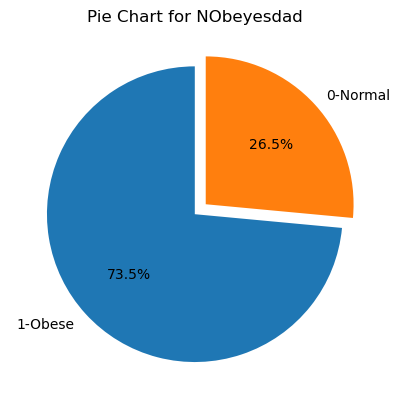

In [619]:
plt.pie(df0['NObeyesdad'].value_counts(), labels=['1-Obese','0-Normal'],
        startangle=90, explode=[0,.1], autopct='%1.1f%%')
plt.title("Pie Chart for NObeyesdad")
plt.show()

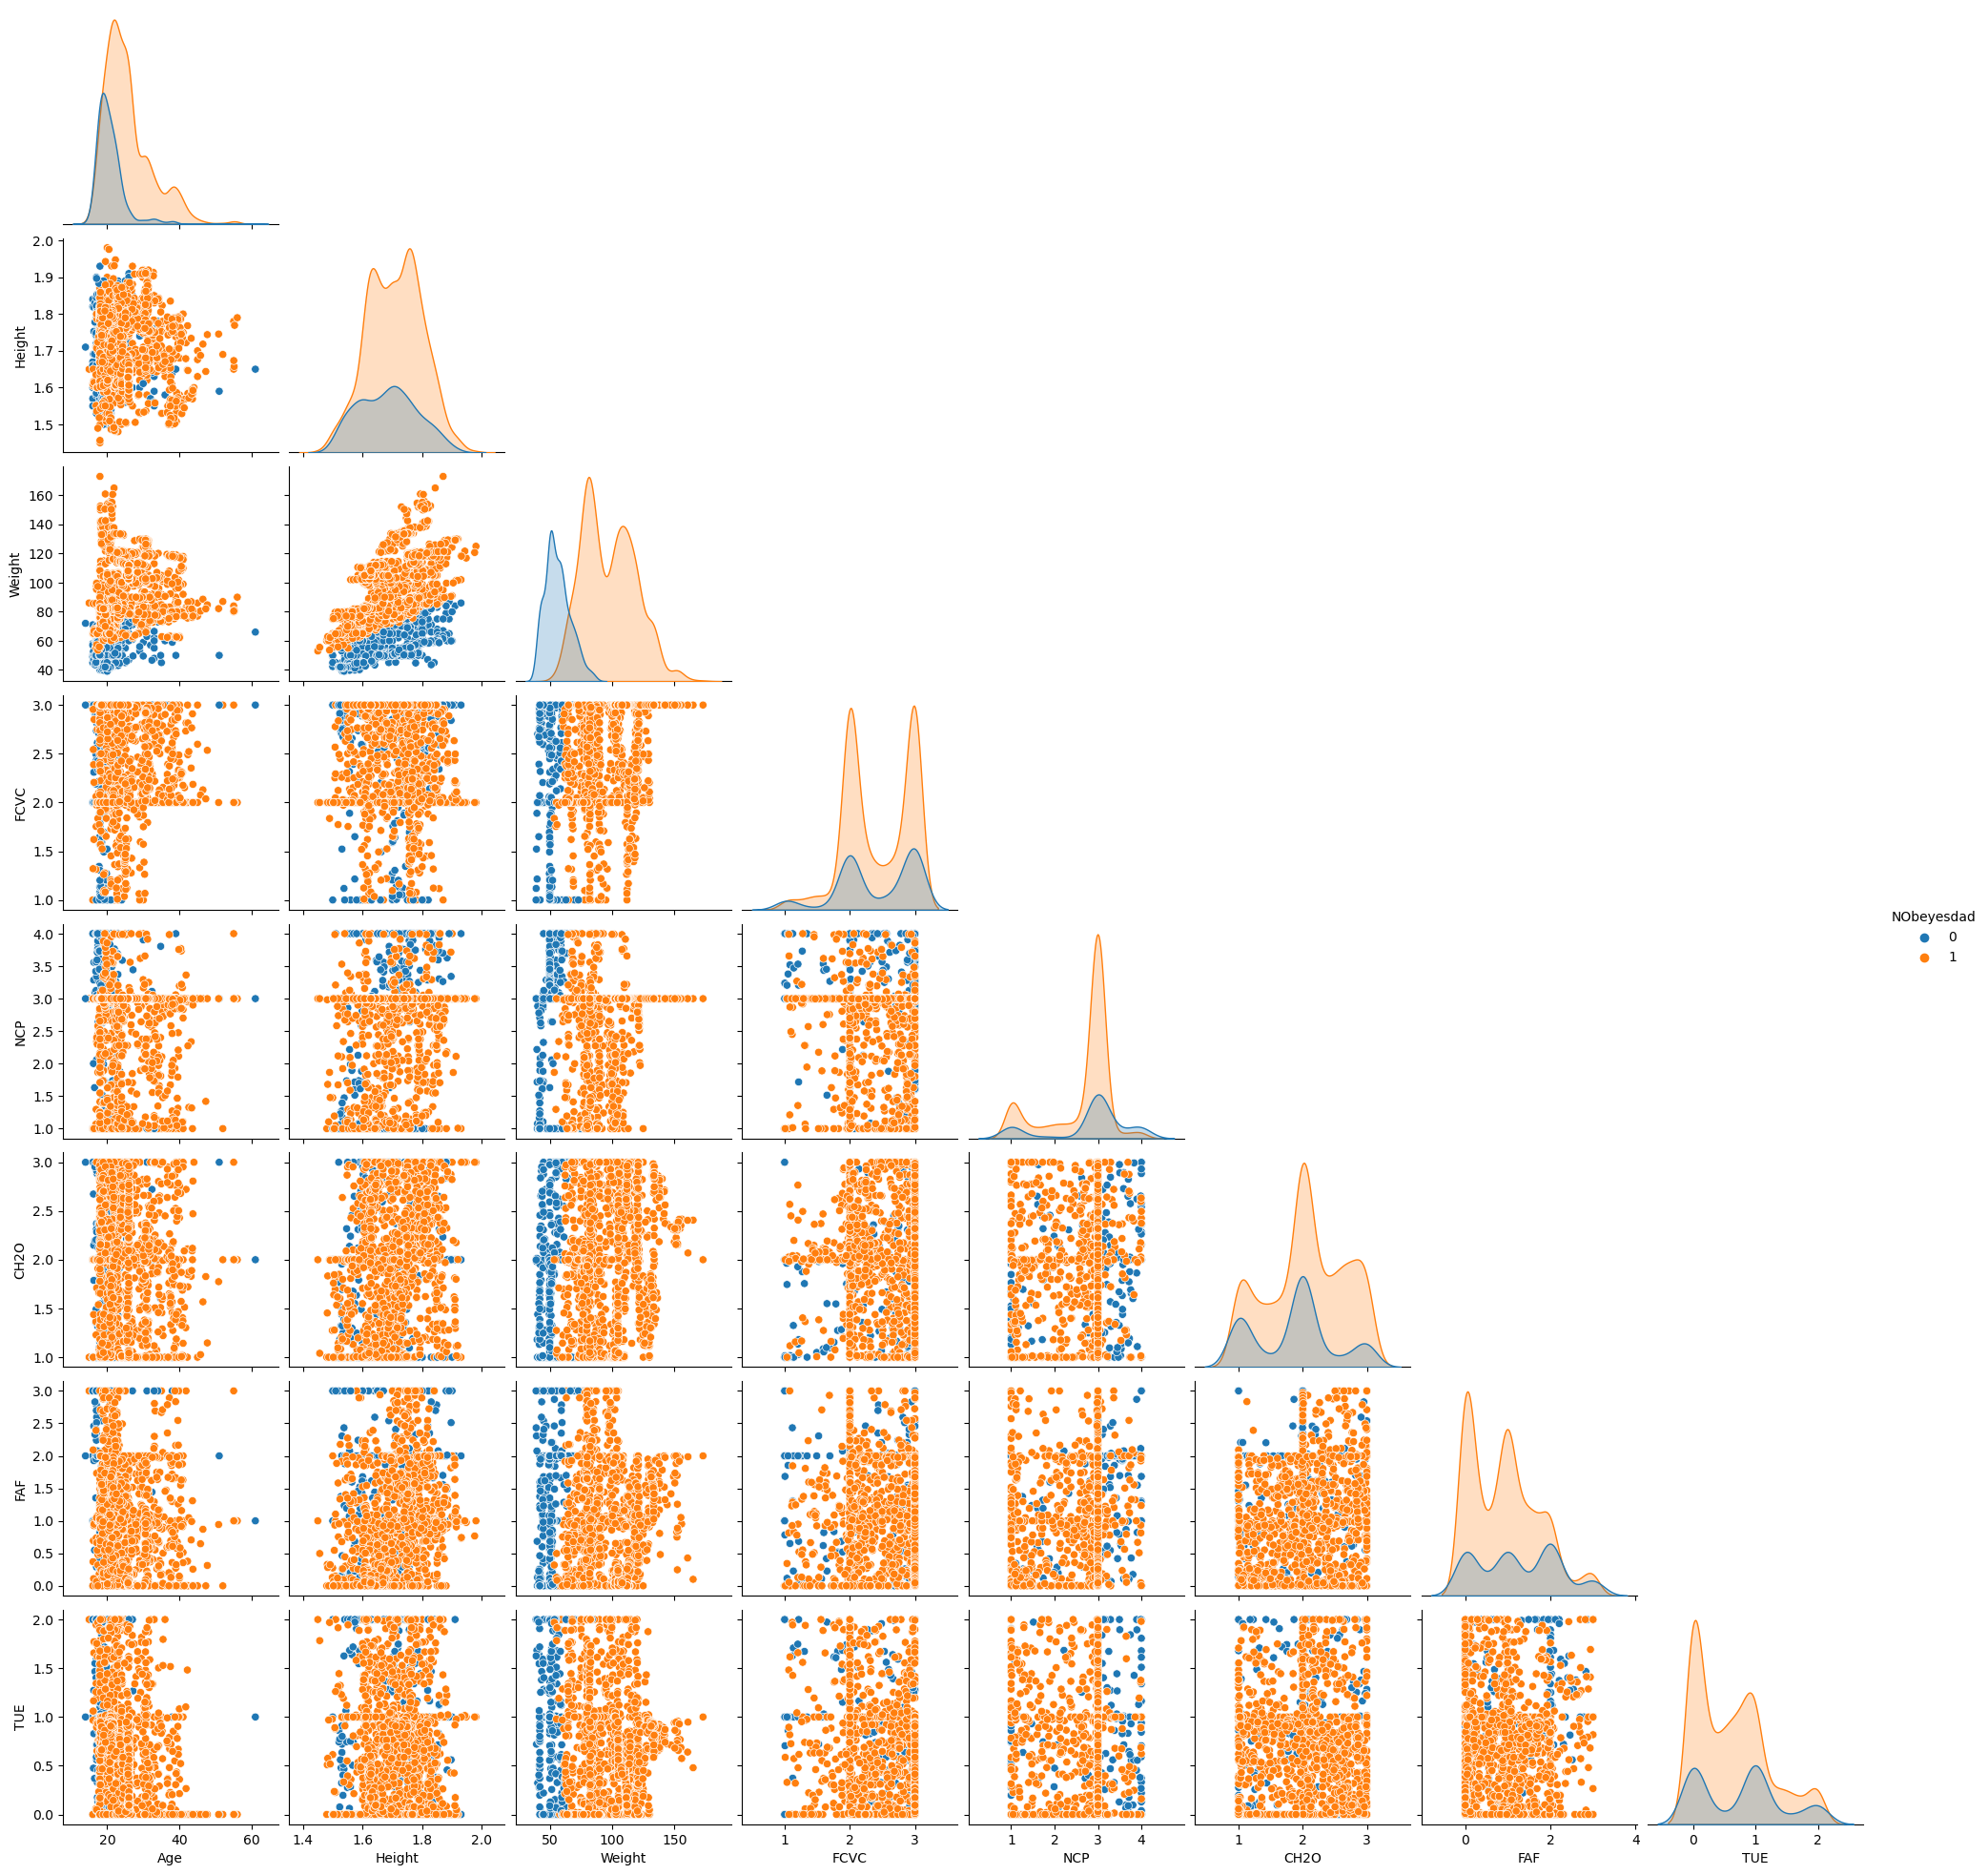

In [629]:
sns.pairplot(df0, hue='NObeyesdad', corner=True)

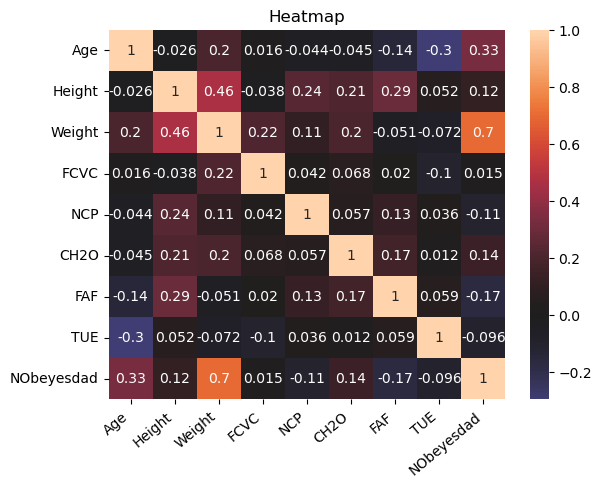

In [628]:
# heatmap
sns.heatmap(df0.select_dtypes(['int','float']).corr(), center=0, annot=True)
plt.xticks(rotation=40, ha='right')
plt.title("Heatmap")
plt.show()

### Categorical Variables

In [664]:
def chi_square(c1, c2, alpha=.05):
    from scipy.stats import chi2_contingency
    res = []
    for col in c1:
        crosstab = np.array(pd.crosstab(c1[col], c2, margins = False))
        chi_sq, p_val, *a = chi2_contingency(crosstab)
        cram_V = np.sqrt(chi_sq/ (np.sum(crosstab)*(min(crosstab.shape)-1)))
        if p_val < alpha: corr="Yes"
        else: corr="No"
        entry = {'Var1':col, 'Var2':c2.name, 'Correlated':corr, 'alpha':alpha, 'p_val':round(p_val,3), "Cramer's V":round(cram_V,3)}
        res.append(entry)
    return pd.DataFrame(res)
chi_square(df0.select_dtypes('object'), df0['NObeyesdad'], .01)

,Var1,Var2,Correlated,alpha,p_val,Cramer's V
0,Gender,NObeyesdad,Yes,0.01,0.000,0.080
1,family_history_with_overweight,NObeyesdad,Yes,0.01,0.000,0.488
2,FAVC,NObeyesdad,Yes,0.01,0.000,0.217
3,CAEC,NObeyesdad,Yes,0.01,0.000,0.507
4,SMOKE,NObeyesdad,No,0.01,0.523,0.014
5,SCC,NObeyesdad,Yes,0.01,0.000,0.134
6,CALC,NObeyesdad,Yes,0.01,0.000,0.135
7,MTRANS,NObeyesdad,Yes,0.01,0.000,0.178


We will drop SMOKE as it is not correlated with target variable at 0.01 significant level.

## Modeling

### Data Preparation

In [624]:
df = df0.copy()

# dropping columns
df.drop(columns=['Weight','SMOKE'], inplace=True)

# encoding categorical variables
df['Gender'] = df.Gender.map({'Male':0, 'Female':1}).astype('uint8')
for col in ['family_history_with_overweight','FAVC','SCC']:
    df[col] = df[col].map({'no':0, 'yes':1}).astype('uint8')
for col in ['CAEC','CALC']:
    df[col] = df[col].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}).astype('uint8')
df = pd.get_dummies(df, columns=['MTRANS'], drop_first=True)
df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,21.0,1.62,1,0,2.0,3.0,1,2.0,0,0.0,1.0,0,0,0,0,1,0
1,1,21.0,1.52,1,0,3.0,3.0,1,3.0,1,3.0,0.0,1,0,0,0,1,0
2,0,23.0,1.80,1,0,2.0,3.0,1,2.0,0,2.0,1.0,2,0,0,0,1,0
3,0,27.0,1.80,0,0,3.0,3.0,1,2.0,0,2.0,0.0,2,1,0,0,0,1
4,0,22.0,1.78,0,0,2.0,1.0,1,2.0,0,0.0,0.0,1,1,0,0,1,0


In [674]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

# splitting train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed, test_size=0.25)

# scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc_train = sc.fit_transform(X_train)
X_sc_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1583, 17) (528, 17) (1583,) (528,)


In [675]:
pd.DataFrame(X_sc_train, columns=X.columns).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Gender,1583.0,0.49,0.50,0.0,0.00,0.00,1.00,1.0
Age,1583.0,0.25,0.15,0.0,0.14,0.21,0.29,1.0
Height,1583.0,0.45,0.19,0.0,0.30,0.45,0.59,1.0
family_history_with_overweight,1583.0,0.81,0.39,0.0,1.00,1.00,1.00,1.0
FAVC,1583.0,0.88,0.33,0.0,1.00,1.00,1.00,1.0
FCVC,1583.0,0.71,0.26,0.0,0.50,0.69,1.00,1.0
NCP,1583.0,0.56,0.26,0.0,0.55,0.67,0.67,1.0
CAEC,1583.0,0.38,0.15,0.0,0.33,0.33,0.33,1.0
CH2O,1583.0,0.51,0.30,0.0,0.31,0.50,0.74,1.0
SCC,1583.0,0.04,0.20,0.0,0.00,0.00,0.00,1.0


Since most of the variables except Age are either discrete or between a small range, MinMax scaler was used to scale the data.  
We can see there are no extreme outliers in the scaled set.

### Models

In [676]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
lr.fit(X_sc_train, y_train)
y_pred = lr.predict(X_sc_test)

from sklearn.model_selection import cross_val_score
crossval = cross_val_score(lr, X_sc_train, y_train, cv=4, n_jobs=-1).mean()

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print("CrossVal:", crossval)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

CrossVal: 0.8622858330136811
Accuracy: 0.8503787878787878
F1 Score: 0.8467207314962684
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       140
           1       0.88      0.92      0.90       388

    accuracy                           0.85       528
   macro avg       0.82      0.79      0.80       528
weighted avg       0.85      0.85      0.85       528

[[ 91  49]
 [ 30 358]]


In [398]:
def model_evaluate(name, model, X_train, y_train, X_test, y_test):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    
    t1 = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    t2 = time()

    crossval = cross_val_score(model, X_train, y_train, cv=4, n_jobs=-1)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    entry = {'CrossVal':crossval.mean(), 'Accuracy':accuracy, 'F1 Score':f1, 'Time':t2-t1}
    return pd.DataFrame(entry, index=[name]), report, confusion

#### Logistic Regression

In [879]:
# solver + penalty + C + class_weight
from sklearn.linear_model import LogisticRegression
param1 = ['lbfgs','liblinear','liblinear']
param2 = ['l2','l1','l2']
param3 = [.01,.1,1,10,100]
param4 = [None,'balanced']
Result = pd.DataFrame([])
for p1,p2 in zip(param1,param2):
    for p3 in param3:
        for p4 in param4:
            lrm = LogisticRegression(solver=p1, penalty=p2, C=p3, class_weight=p4, max_iter=500)
            res = model_evaluate(f"{p1} + {p2} + {p3} + {p4}", lrm, X_sc_train, y_train, X_sc_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
liblinear + l1 + 0.1 + balanced,0.879985,0.869318,0.871353,0.007000
lbfgs + l2 + 100 + None,0.878085,0.859848,0.858852,0.010810
liblinear + l1 + 10 + None,0.878085,0.859848,0.858852,0.011000
liblinear + l1 + 100 + None,0.878085,0.859848,0.858852,0.012458
liblinear + l2 + 100 + None,0.878085,0.859848,0.858852,0.003996


When evaluating the hyperparameters, we priotize f1 score over accuracy because the target classes are imbalanced.

In [818]:
# best logistic regression
lrm = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, class_weight='balanced')
Result_LR = model_evaluate('1.LR', lrm, X_sc_train, y_train, X_sc_test, y_test)
print(Result_LR[0].round(4), "\n")
print(Result_LR[1])
print(Result_LR[2])

      CrossVal  Accuracy  F1 Score    Time
1.LR      0.88    0.8693    0.8714  0.0049 

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       140
           1       0.93      0.89      0.91       388

    accuracy                           0.87       528
   macro avg       0.83      0.85      0.84       528
weighted avg       0.87      0.87      0.87       528

[[113  27]
 [ 42 346]]


In [860]:
# ROC curve and AUC score
def roc_auc(name, model, X_test, y_test):
    from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, auc
    try:
        y_prob = model.predict_proba(X_test)[:,1]
    except:
        y_prob = model.decision_function(X_test)   # for SGD loss='hinge'
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name=name).plot()
    plt.plot([0,1],[0,1], linestyle='dashed')
    plt.title(f"{name} ROC Curve")
    plt.show()
    return auc(fpr, tpr)

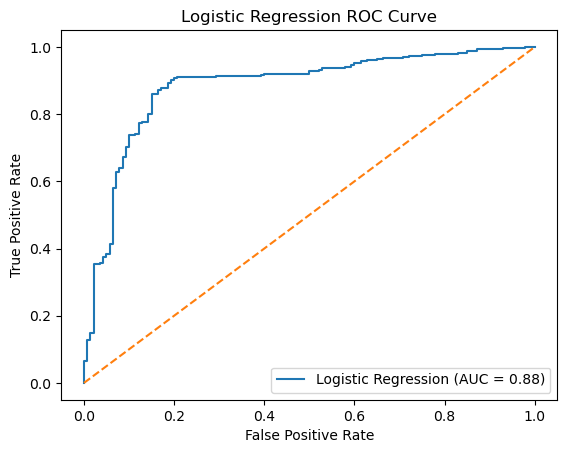

In [861]:
Result_LR[0]['ROC-AUC'] = roc_auc('Logistic Regression', lrm, X_sc_test, y_test)

#### Logistic Regression with PCA

In [683]:
# feature selection attempt with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
X_pca.shape[1]

12

In [782]:
# solver + penalty + C + class_weight
param1 = ['lbfgs','liblinear','liblinear']
param2 = ['l2','l1','l2']
param3 = [.01,.1,1,10,100]
param4 = [None,'balanced']
Result = pd.DataFrame([])
for p1,p2 in zip(param1,param2):
    for p3 in param3:
        for p4 in param4:
            lr_pca = LogisticRegression(solver=p1, penalty=p2, C=p3, class_weight=p4, max_iter=500)
            res = model_evaluate(f"{p1} + {p2} + {p3} + {p4}", lr_pca, X_pca, y_train, X_pca_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
liblinear + l1 + 10 + balanced,0.862294,0.848485,0.852536,0.003558
liblinear + l1 + 100 + balanced,0.862294,0.848485,0.852536,0.004033
lbfgs + l2 + 100 + balanced,0.861663,0.848485,0.852536,0.008516
liblinear + l2 + 100 + balanced,0.861663,0.848485,0.852536,0.004000
lbfgs + l2 + 10 + balanced,0.861031,0.846591,0.850812,0.007758


In [1206]:
lr_pca = LogisticRegression(solver='liblinear', penalty='l1', C=10, class_weight='balanced')
Result_LR_PCA = model_evaluate('2.LR_PCA_12', lr_pca, X_pca, y_train, X_pca_test, y_test)
print(Result_LR_PCA[0].round(4), "\n")
print(Result_LR_PCA[1])
print(Result_LR_PCA[2])

             CrossVal  Accuracy  F1 Score    Time
2.LR_PCA_12    0.8623    0.8485    0.8525  0.0088 

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       140
           1       0.93      0.86      0.89       388

    accuracy                           0.85       528
   macro avg       0.80      0.84      0.82       528
weighted avg       0.86      0.85      0.85       528

[[114  26]
 [ 54 334]]


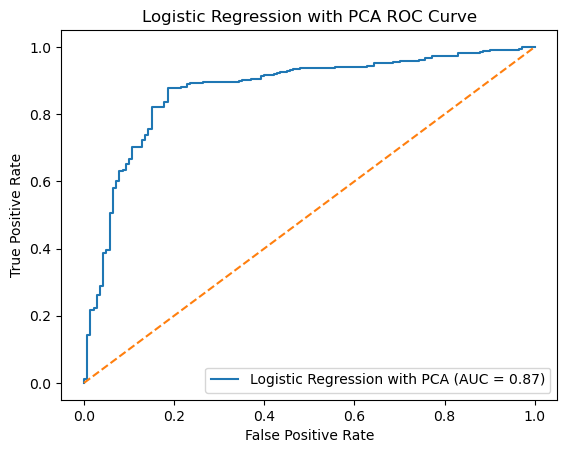

In [1207]:
Result_LR_PCA[0]['ROC-AUC'] = roc_auc('Logistic Regression with PCA', lr_pca, X_pca_test, y_test)

#### K-Nearest Neighbors

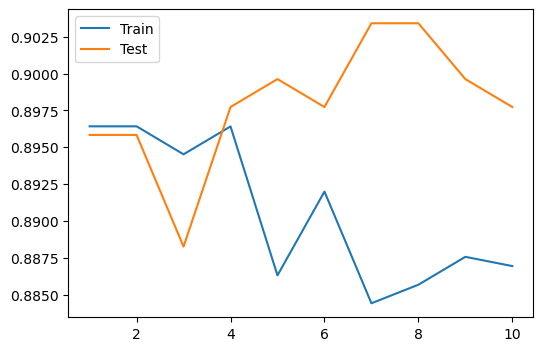

In [688]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores = []
scores_test = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
    scores.append(cross_val_score(knn, X_sc_train, y_train, cv=4, n_jobs=-1).mean())
    scores_test.append(knn.fit(X_sc_train, y_train).score(X_sc_test, y_test))
plt.figure(figsize=(6,4))
plt.plot(range(1,11), scores, label="Train")
plt.plot(range(1,11), scores_test, label="Test")
plt.legend()
plt.show()

In [689]:
# n_neighbors + weights + p
param1 = [2,3,4,5]
param2 = ['uniform','distance']
param3 = [2,1]
Result = pd.DataFrame([])
for p1 in param1:
    for p2 in param2:
        for p3 in param3:
            knn = KNeighborsClassifier(n_neighbors=p1, weights=p2, p=p3, n_jobs=-1)
            res = model_evaluate(f"{p1} + {p2} + {p3}", knn, X_sc_train, y_train, X_sc_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
4 + distance + 1,0.911567,0.920455,0.919487,0.079387
2 + distance + 1,0.899567,0.918561,0.917881,0.078445
4 + uniform + 1,0.914728,0.914773,0.914675,0.087329
3 + distance + 1,0.913461,0.912879,0.911820,0.077972
5 + distance + 1,0.909043,0.912879,0.911119,0.076569


The first two combinations gave higher f1 score on test set than training score, so third combination was chosen as the best option.

In [822]:
# best KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', p=1, n_jobs=-1)
Result_KNN = model_evaluate('3.KNN', knn, X_sc_train, y_train, X_sc_test, y_test)
print(Result_KNN[0].round(4), "\n")
print(Result_KNN[1])
print(Result_KNN[2])

       CrossVal  Accuracy  F1 Score    Time
3.KNN    0.9147    0.9148    0.9147  0.0555 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.94      0.94      0.94       388

    accuracy                           0.91       528
   macro avg       0.89      0.89      0.89       528
weighted avg       0.91      0.91      0.91       528

[[117  23]
 [ 22 366]]


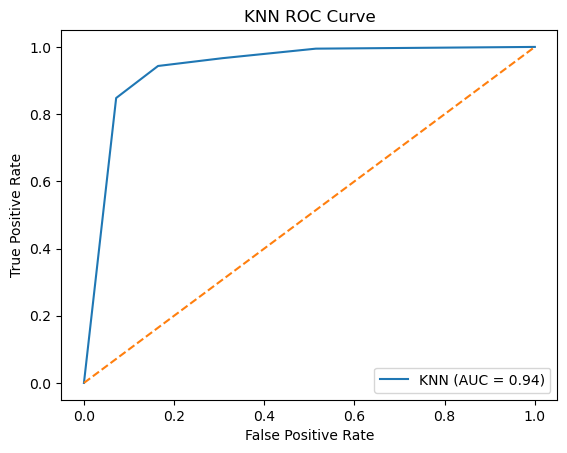

In [857]:
Result_KNN[0]['ROC-AUC'] = roc_auc('KNN', knn, X_sc_test, y_test)

#### Stochastic Gradient Descent (SGD)

In [692]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=seed, n_jobs=-1)
model_evaluate('SGD', sgd, X_sc_train, y_train, X_sc_test, y_test)[0]

,CrossVal,Accuracy,F1 Score,Time
SGD,0.876844,0.869318,0.869757,0.013283


In [695]:
from sklearn.model_selection import RandomizedSearchCV
param = {'loss':['hinge','log_loss','modified_huber','perceptron'],
         'penalty':['l2','l1','elasticnet',None],
         'l1_ratio':[.15,.2,.1,.05],
         'learning_rate':['optimal','adaptive','invscaling'],
         'eta0':[.5,1,10],
         'alpha':[.0001,.001,.00001]}
model = RandomizedSearchCV( SGDClassifier(random_state=seed, n_jobs=-1), param_distributions=param, n_iter=400, cv=4, n_jobs=-1)
model.fit(X_sc_train, y_train)
print(model.best_params_)
print(model.best_score_)

{'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'adaptive', 'l1_ratio': 0.15, 'eta0': 0.5, 'alpha': 0.0001}
0.8894578698376167


In [832]:
model = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='adaptive', eta0=.5, random_state=seed, n_jobs=-1)
model_evaluate('SGD', model, X_sc_train, y_train, X_sc_test, y_test)[0]

,CrossVal,Accuracy,F1 Score,Time
SGD,0.889458,0.867424,0.868014,0.009039


In [713]:
# loss + penalty + l1_ratio
param1 = ['hinge','log_loss','modified_huber','perceptron']
param2 = ['l2','l1','elasticnet',None]
param3 = [.15,.2,.1,.05]
Result = pd.DataFrame([])
for p1 in param1:
    for p2 in param2:
        for p3 in param3:
            sgd = SGDClassifier(loss=p1, penalty=p2, l1_ratio=p3, random_state=seed, n_jobs=-1)
            res = model_evaluate(f"{p1} + {p2} + {p3}", sgd, X_sc_train, y_train, X_sc_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
hinge + l2 + 0.15,0.876844,0.869318,0.869757,0.006959
hinge + l2 + 0.2,0.876844,0.869318,0.869757,0.008967
hinge + l2 + 0.1,0.876844,0.869318,0.869757,0.011114
hinge + l2 + 0.05,0.876844,0.869318,0.869757,0.007740
hinge + elasticnet + 0.15,0.872420,0.867424,0.866151,0.007534


In [708]:
# learning_rate + eta0 + alpha
param4 = ['optimal','adaptive','invscaling']
param5 = [.5,1,10]
param6 = [.0001,.001,.00001]
Result = pd.DataFrame([])
for p4 in param4:
    for p5 in param5:
        for p6 in param6:
            sgd = SGDClassifier(learning_rate=p4, eta0=p5, alpha=p6, random_state=seed, n_jobs=-1)
            res = model_evaluate(f"{p4} + {p5} + {p6}", sgd, X_sc_train, y_train, X_sc_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
invscaling + 10 + 1e-05,0.876189,0.869318,0.870041,0.006584
adaptive + 0.5 + 1e-05,0.888828,0.869318,0.869757,0.009000
adaptive + 10 + 1e-05,0.884406,0.869318,0.869757,0.012000
optimal + 0.5 + 0.0001,0.876844,0.869318,0.869757,0.008010
optimal + 1 + 0.0001,0.876844,0.869318,0.869757,0.008511


In [824]:
# best SGD classifier
sgd = SGDClassifier(learning_rate='invscaling', eta0=10, alpha=.00001, random_state=seed, n_jobs=-1)
Result_SGD = model_evaluate('4.SGD', sgd, X_sc_train, y_train, X_sc_test, y_test)
print(Result_SGD[0].round(4), "\n")
print(Result_SGD[1])
print(Result_SGD[2])

       CrossVal  Accuracy  F1 Score    Time
4.SGD    0.8762    0.8693      0.87  0.0059 

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       140
           1       0.92      0.90      0.91       388

    accuracy                           0.87       528
   macro avg       0.83      0.84      0.83       528
weighted avg       0.87      0.87      0.87       528

[[108  32]
 [ 37 351]]


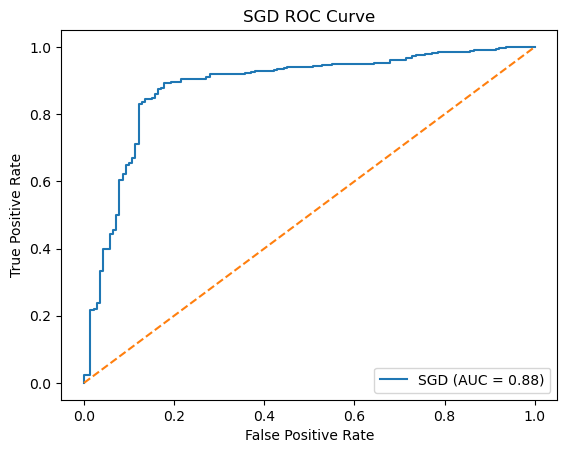

In [863]:
Result_SGD[0]['ROC-AUC'] = roc_auc('SGD', sgd, X_sc_test, y_test)

#### Decision Tree

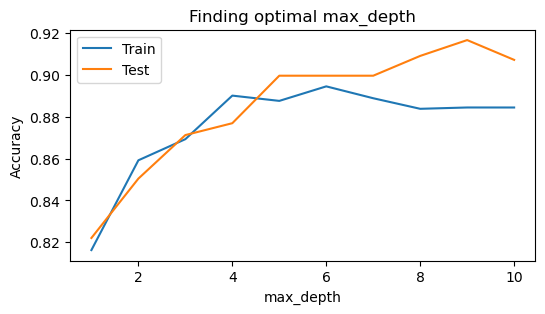

In [1483]:
from sklearn.tree import DecisionTreeClassifier
scores = []
scores_test = []
for i in range(1,11,1):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=seed)
    scores.append(cross_val_score(dtc, X_train, y_train, cv=4).mean())
    scores_test.append(dtc.fit(X_train, y_train).score(X_test, y_test))
plt.figure(figsize=(6,3))
plt.plot(range(1,11,1), scores, label="Train")
plt.plot(range(1,11,1), scores_test, label="Test")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")
plt.legend()
plt.show()

In [881]:
# criterion + class_weight + max_depth
param1 = ['gini','entropy','log_loss']
param2 = [None,'balanced']
param3 = [4,5,6]
Result = pd.DataFrame([])
for p1 in param1:
    for p2 in param2:
        for p3 in param3:
            dtc = DecisionTreeClassifier(criterion=p1, class_weight=p2, max_depth=p3, random_state=seed)
            res = model_evaluate(f"{p1} + {p2} + {p3}", dtc, X_train, y_train, X_test, y_test)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['F1 Score','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,Time
gini + None + 6,0.894518,0.899621,0.898783,0.010000
gini + None + 5,0.887570,0.899621,0.896267,0.008998
entropy + None + 6,0.885662,0.886364,0.885555,0.013000
log_loss + None + 6,0.885662,0.886364,0.885555,0.013000
entropy + balanced + 6,0.870510,0.884470,0.884067,0.017721


In [826]:
# best decision tree classifier
dtc = DecisionTreeClassifier(max_depth=6, random_state=seed)
Result_DT = model_evaluate('5.DT', dtc, X_train, y_train, X_test, y_test)
print(Result_DT[0].round(4), "\n")
print(Result_DT[1])
print(Result_DT[2])

      CrossVal  Accuracy  F1 Score    Time
5.DT    0.8945    0.8996    0.8988  0.0065 

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       140
           1       0.92      0.94      0.93       388

    accuracy                           0.90       528
   macro avg       0.88      0.86      0.87       528
weighted avg       0.90      0.90      0.90       528

[[110  30]
 [ 23 365]]


In [777]:
dtc.feature_importances_

array([0.00238218, 0.18469189, 0.03588902, 0.19087353, 0.00820691,
       0.        , 0.02755413, 0.34844068, 0.02609184, 0.01722524,
       0.11476624, 0.03368028, 0.00260014, 0.        , 0.        ,
       0.        , 0.00759792])

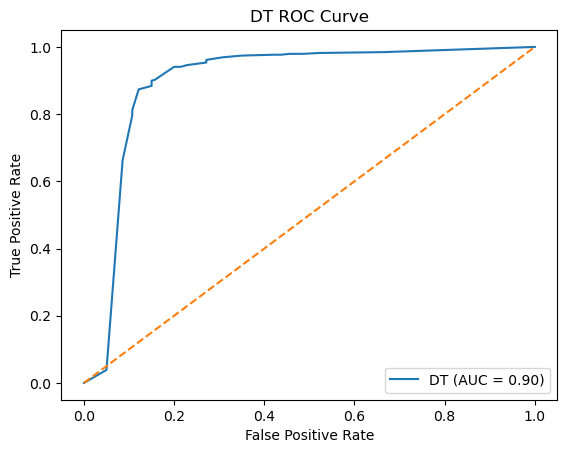

In [865]:
Result_DT[0]['ROC-AUC'] = roc_auc('DT', dtc, X_test, y_test)

#### Random Forest

In [299]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=seed, n_jobs=-1)
model_evaluate('RF', rfc, X_train, y_train, X_test, y_test)[0]

,CrossVal,Accuracy,F1 Score,Time
RF,0.916622,0.931818,0.931661,0.163321


In [300]:
scores = []
scores_test = []
for i in range(10,201,10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train, y_train)
    scores.append(cross_val_score(rfc,X_train,y_train,cv=4).mean())
    scores_test.append(rfc.fit(X_train, y_train).score(X_test, y_test))

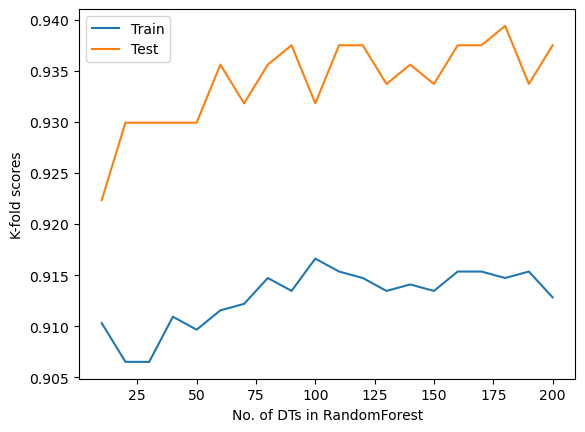

In [301]:
plt.plot(range(10,201,10),scores,label="Train")
plt.plot(range(10,201,10),scores_test,label="Test")
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.legend()
plt.show()

From the plot we can see there is a consistant pattern of having higher test score than train score. This indicates an underfit and hyperparameter will be tuned to avoid this.

In [763]:
from sklearn.model_selection import RandomizedSearchCV
param = {'criterion':['gini','entropy','log_loss'],
         'n_estimators':[100,90,80],
         'max_depth':[None,20,40,60],
         'max_leaf_nodes':[None,10,20,30],
         'min_samples_split':[5,8,10],
         'max_features':['sqrt',3,5,6]}
model = RandomizedSearchCV(RandomForestClassifier(random_state=seed, n_jobs=-1), 
                           param_distributions=param, n_iter=200, cv=4, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_params_)
print(model.best_score_)

{'n_estimators': 90, 'min_samples_split': 5, 'max_leaf_nodes': None, 'max_features': 3, 'max_depth': 60, 'criterion': 'gini'}
0.9204081958828795


In [828]:
# best random forest classifier
rfc = RandomForestClassifier(n_estimators=90, criterion='gini', max_depth=60, max_features=3, 
                             min_samples_split=5, random_state=seed, n_jobs=-1)
Result_RF = model_evaluate('6.RF', rfc, X_train, y_train, X_test, y_test)
print(Result_RF[0].round(4), "\n")
print(Result_RF[1])
print(Result_RF[2])

      CrossVal  Accuracy  F1 Score    Time
6.RF    0.9204    0.9205    0.9205  0.1485 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       140
           1       0.95      0.95      0.95       388

    accuracy                           0.92       528
   macro avg       0.90      0.90      0.90       528
weighted avg       0.92      0.92      0.92       528

[[119  21]
 [ 21 367]]


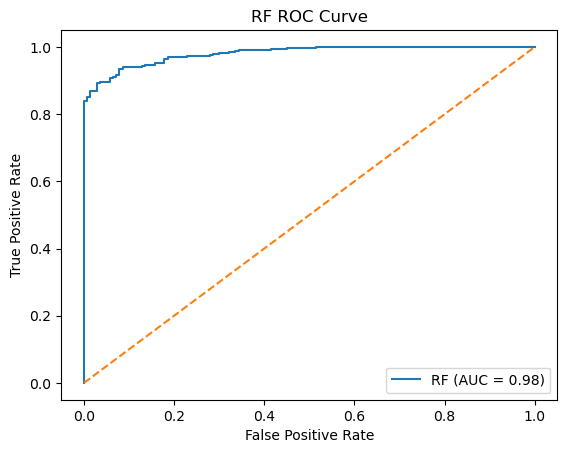

In [867]:
Result_RF[0]['ROC-AUC'] = roc_auc('RF', rfc, X_test, y_test)

In [882]:
# feature importance
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Importance': rfc.feature_importances_}, index=X.columns)
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances

,Importance
CAEC,0.175364
Age,0.158654
family_history_with_overweight,0.124127
FAF,0.080364
NCP,0.076152
Height,0.073571
CH2O,0.072729
TUE,0.071237
FCVC,0.042434
MTRANS_Public_Transportation,0.025487


## Model Evaluation

In [868]:
Result_Evaluate = pd.concat([Result_LR[0],Result_LR_PCA[0],Result_KNN[0],Result_SGD[0],Result_DT[0],Result_RF[0]],axis=0)
Result_Evaluate.round(4)

,CrossVal,Accuracy,F1 Score,Time,ROC-AUC
1.LR,0.8800,0.8693,0.8714,0.0049,0.8832
2.LR_PCA_12,0.8623,0.8485,0.8525,0.0039,0.8714
3.KNN,0.9147,0.9148,0.9147,0.0555,0.9375
4.SGD,0.8762,0.8693,0.8700,0.0059,0.8815
5.DT,0.8945,0.8996,0.8988,0.0065,0.8971
6.RF,0.9204,0.9205,0.9205,0.1485,0.9803


From the ROC-AUC score of each model we can conclude that model 6 using Random Forest method was the best model for this prediction, with a ROC-AUC score of 0.98 and F1 score of 0.92.

Model 6 has similar cross validation training score with the accuracy and f1 score, and has the highest f1 score among all other models. However, it is also the most time consuming model, spending 0.15 seconds on fitting and predicting, about 30 times slower than logistic/SGD/DT models.

The second best performing model is Model 3 with KNN method, with a 0.94 on ROC-AUC score and F1 score of 0.91. It is also more time consuming compared to other models.

In [874]:
print(Result_RF[1])
print(Result_RF[2])

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       140
           1       0.95      0.95      0.95       388

    accuracy                           0.92       528
   macro avg       0.90      0.90      0.90       528
weighted avg       0.92      0.92      0.92       528

[[119  21]
 [ 21 367]]


In [895]:
from sklearn.preprocessing import binarize
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred_thresh = binarize(y_prob.reshape(-1,1), threshold=0.8)
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82       140
           1       1.00      0.84      0.91       388

    accuracy                           0.88       528
   macro avg       0.84      0.92      0.86       528
weighted avg       0.92      0.88      0.89       528

[[139   1]
 [ 62 326]]


In [896]:
from sklearn.preprocessing import binarize
y_prob = rfc.predict_proba(X_test)[:,1]
y_pred_thresh = binarize(y_prob.reshape(-1,1), threshold=0.3)
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76       140
           1       0.88      0.99      0.93       388

    accuracy                           0.90       528
   macro avg       0.92      0.81      0.85       528
weighted avg       0.90      0.90      0.89       528

[[ 88  52]
 [  3 385]]


If the goal of the project is to correctly identifing either all the normal or all the obese group, the threshold of the binary classification can be adjusted for each case.  
- To identify all the normal group with 99% recall rate, the threshold can be set to 0.8.
- To identify all the obese group with 99% recall rate, the threshold can be set to 0.3.

## Conclusion

Prediction models were built to predict whether an individual is normal or overweight/obese based on the individual's health related attributes, while not knowing the weight of the individual.

The best model constructed was using Random Forest ensemble method, with a F1 score of 0.92. The model gives a 0.85 recall score on the normal class and 0.95 recall score on overweight/obese class.

From the feature importance of this model we can conclude that the five most important attributes that are related with obesity are:
1. Consumption of food between meals
2. Age
3. Family history with overweight
4. Physical activity frequency
5. Number of main meals

#######################################################################  
#######################################################################

# P2: Inventory Clustering

## Objective

Product Segmentation: The primary goal is to categorize products (SKUs) into meaningful clusters based on attributes relatd to handling and turnover, including unit price, expiration date, outbound metrics, and pallet-related features. This segmentation will reveal natural groupings and enable a deeper understanding of product behavior within the inventory.

Pattern and Behavior Analysis: By creating distinct clusters, the project aims to uncover patterns and behaviors among products. This analysis can guide decision-making processes related to marketing strategies, inventory management, pricing, and sales tactics, ultimately leading to more informed and data-driven business strategies.

## Data Source

Data downloaded from UCI:<br>
https://archive.ics.uci.edu/dataset/585/stock+keeping+units <br>
The dataset comprises 2279 rows and 8 columns with features related to inventory management that can be utilized by a classical ABC analysis. The dataset is gathered for period 2017-02-06 to 2018-02-13.

The dataset contains the following information:<br>
ID - Unique identifier for each product.<br>
Unitprice - The unit price in euro.<br>
Expire date - The shelf-life days of the product.<br>
Outbound number - Number of orders on this product.<br>
Total outbound - Number of pallets sold.<br>
Pal grossweight - Gross weight of a fully-loaded pallet in kg.<br>
Pal height - Height of a fully-loaded pallet in cm.<br>
Units per pal - The number of units of the product on a pallet.

## Importing Data

In [1008]:
data0 = pd.read_excel("sku_data.xlsx")
data0.shape

(2279, 8)

In [1009]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2279 non-null   int64  
 1   Unitprice        2279 non-null   float64
 2   Expire date      2279 non-null   int64  
 3   Outbound number  2279 non-null   int64  
 4   Total outbound   2279 non-null   float64
 5   Pal grossweight  2279 non-null   float64
 6   Pal height       2279 non-null   float64
 7   Units per pal    2279 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 142.6 KB


In [1010]:
data0.sample(5)

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
284,285,1.080,547,2,2.0,207.68,1.0,384
2221,2222,0.000,0,1,10.0,6.00,0.0,10
253,254,2.040,730,2,2.0,336.96,0.9,288
2215,2216,5.905,0,7,19.0,240.00,0.0,400
711,712,0.000,0,0,0.0,0.00,0.6,150


In [1011]:
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2279.0,1140.000000,658.034953,1.0,570.5,1140.0000,1709.500,2279.000
Unitprice,2279.0,4.269402,14.449000,0.0,0.0,1.2938,4.545,518.592
Expire date,2279.0,410.371654,240.875419,0.0,365.0,547.0000,547.000,734.000
Outbound number,2279.0,235.976305,700.230685,0.0,0.0,1.0000,45.000,6325.000
Total outbound,2279.0,731.701053,2146.029848,0.0,0.0,3.0000,419.500,26411.000
Pal grossweight,2279.0,192.939582,164.616813,0.0,60.0,167.6800,277.560,907.200
Pal height,2279.0,0.672798,0.552117,0.0,0.0,0.8400,1.020,2.160
Units per pal,2279.0,755.563405,6278.437915,0.0,32.0,108.0000,384.000,200000.000


In [1012]:
data0.astype('object').describe().T

,count,unique,top,freq
ID,2279.0,2279.0,1.0,1.0
Unitprice,2279.0,772.0,0.0,710.0
Expire date,2279.0,6.0,547.0,1250.0
Outbound number,2279.0,501.0,0.0,979.0
Total outbound,2279.0,723.0,0.0,979.0
Pal grossweight,2279.0,286.0,0.0,371.0
Pal height,2279.0,56.0,0.0,787.0
Units per pal,2279.0,103.0,108.0,303.0


In [1002]:
data0.duplicated().sum()

0

In [1003]:
data0.isnull().sum().sum()

0

## Exploratory Analysis

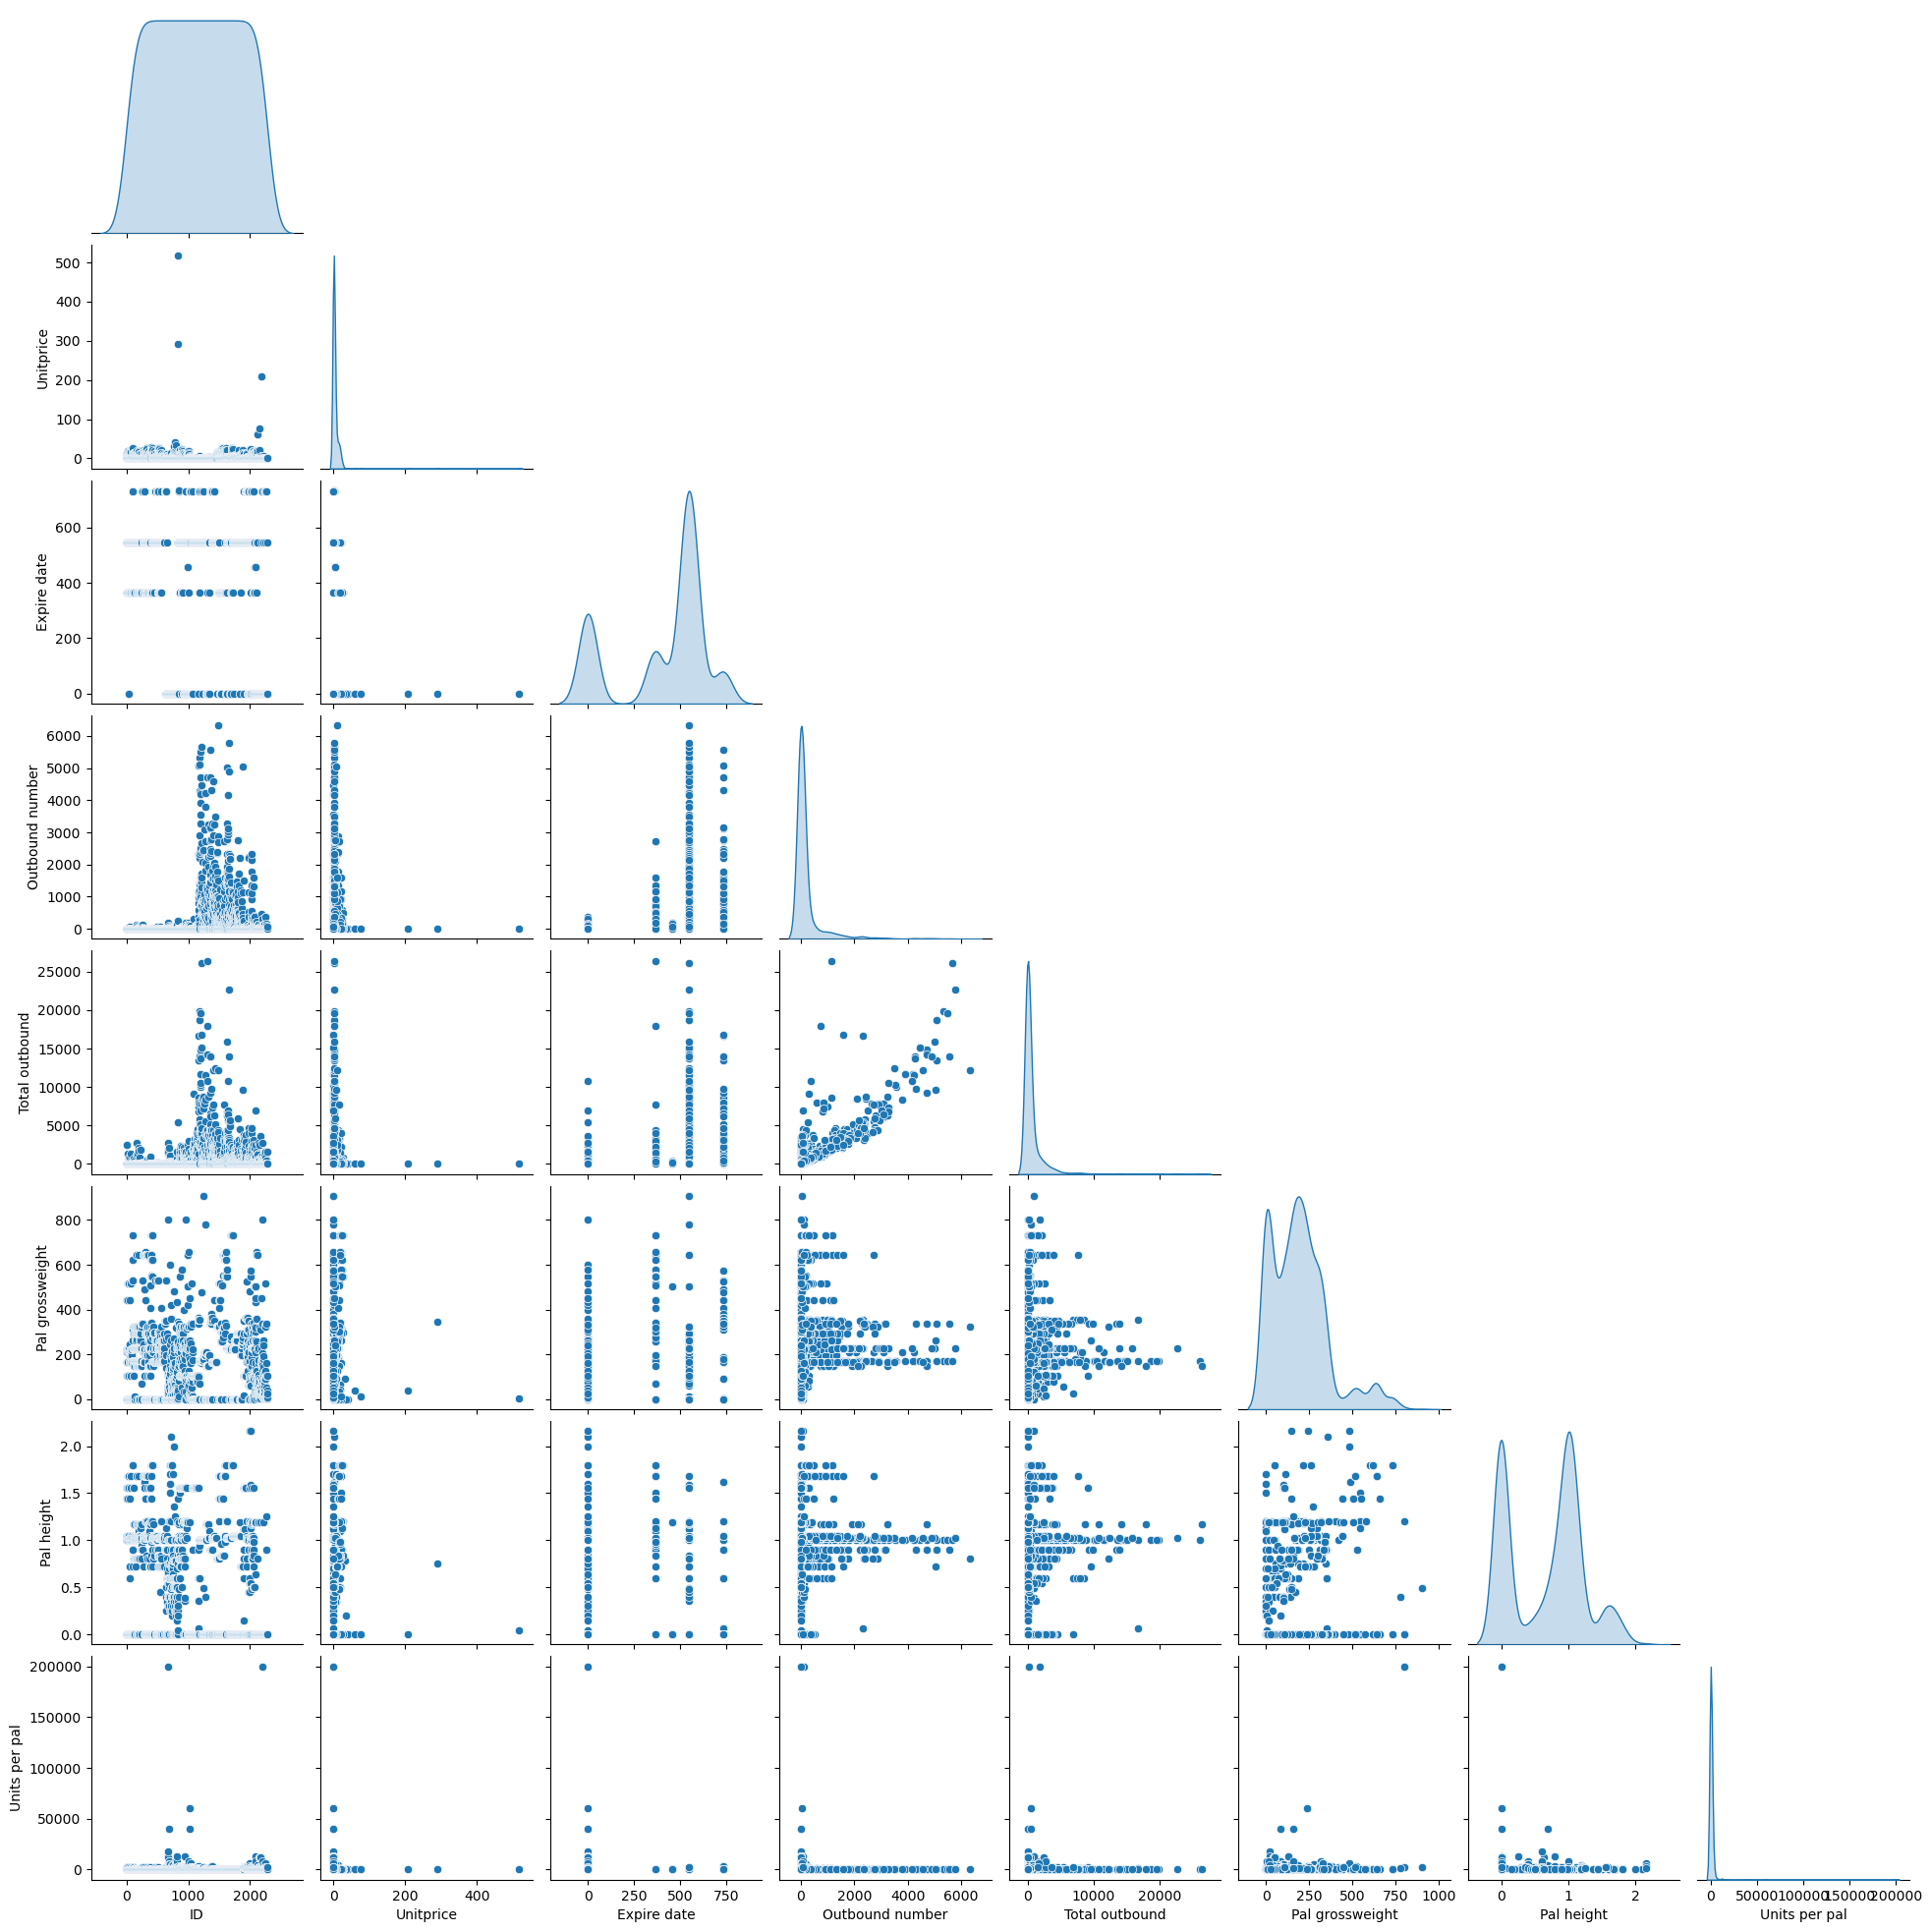

In [936]:
sns.pairplot(data0, corner=True, diag_kind='kde')

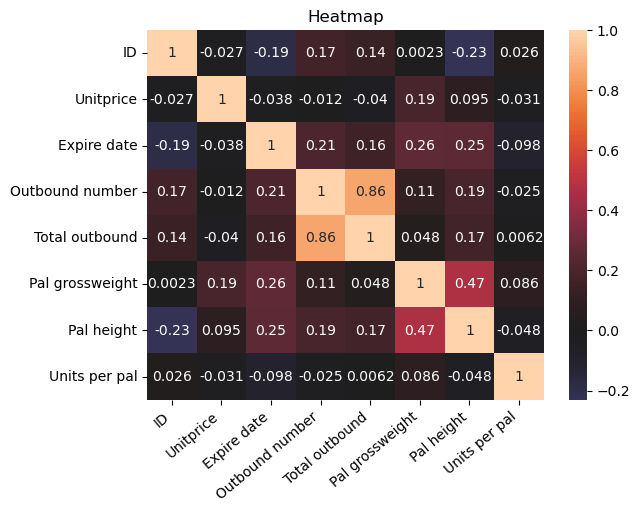

In [920]:
# heatmap
sns.heatmap(data0.corr(), center=0, annot=True)
plt.xticks(rotation=40, ha='right')
plt.title("Heatmap")
plt.show()

From the above correlation heat map we can see there is a high correlation between Outbound number and Total outbound. The definition of Outbound number is the total number of orders placed, and Total outbound is the total number of pallets sold. We can convert column Outbound number into average number of pallets per order.

## Modeling

### Feature Engineering

In [1395]:
data = data0.copy()
data.drop(columns='ID', inplace=True)
data.shape

(2279, 7)

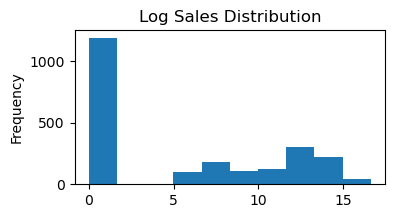

In [1396]:
# total sales
data['Sales'] = data['Unitprice'] * data['Units per pal'] * data['Total outbound']
data['Sales'] = data['Sales'].map(lambda x: np.log(x) if x>0 else 0)
plt.figure(figsize=(4,2))
data['Sales'].plot(kind='hist')
plt.title("Log Sales Distribution")
plt.show()

In [1397]:
# converting Outbound number
data['Avg_Order_Pal'] = data['Total outbound'] / data['Outbound number']
data.loc[data['Outbound number']==0, 'Avg_Order_Pal'] = 0
data.drop(columns='Outbound number', inplace=True)
data['Avg_Order_Pal'].corr(data['Total outbound'])

0.07408069827184681

After converting the feature Outbound number to Avg_Order_Pal, the correlation with Total outbound was dropped to 0.07 from 0.86.

In [1401]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data)
data_sc.shape

(2279, 8)

### Clustering

In [1432]:
import warnings
warnings.filterwarnings('ignore')

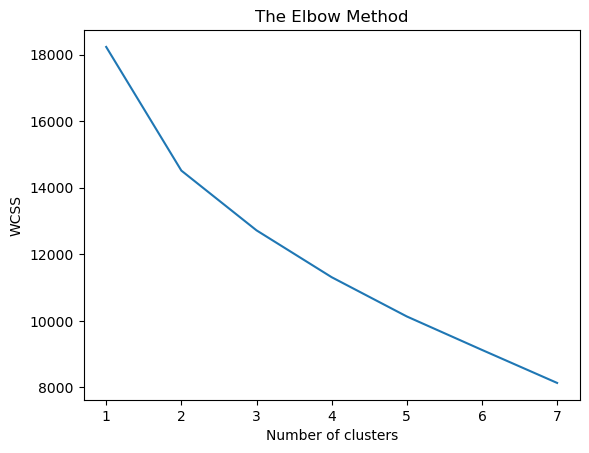

In [1434]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init='random', n_init=10, random_state=seed)
    kmeans.fit(data_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

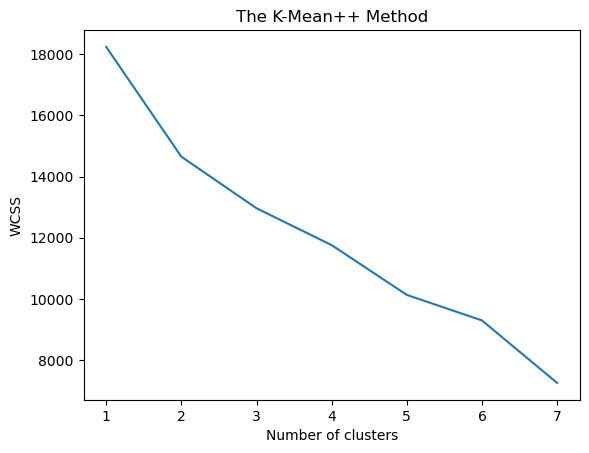

In [1433]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, n_init='auto', random_state=seed)
    kmeans.fit(data_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The K-Mean++ Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

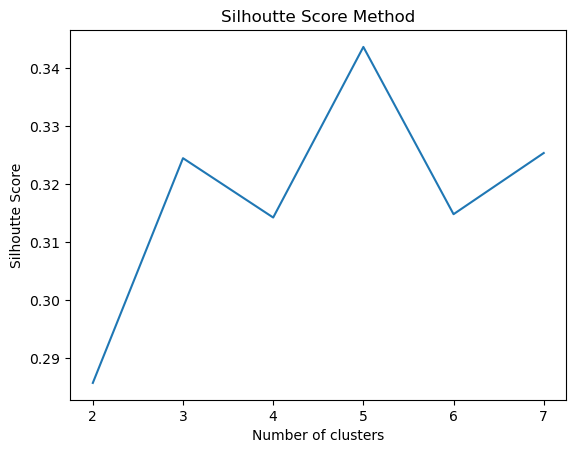

In [1435]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silh = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters = i, n_init='auto', random_state=seed)
    silh.append(silhouette_score(data_sc, kmeans.fit_predict(data_sc)))
plt.plot(range(2, 8), silh)
plt.title('Silhoutte Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

From the Elbow and K-Mean++ method above, we could not find a good diminishing return point in WCSS. However, the Silhoutte score method shows there is a local maximum at 3 and 5 clusters, 5 seems to be the better options here as the Silhoutte score would be higher and WCSS would be lower, but in terms of reducing complexity for business understanding, 3 was chosen to be the number of clusters.

In [1464]:
k = 3
kmeans = KMeans(n_clusters = k, n_init='auto', random_state=seed)
y_kmeans = kmeans.fit_predict(data_sc)
data_grp = data.copy()
data_grp['Sales'] = data_grp['Sales'].map(lambda x: np.exp(x) if x>0 else 0)    # convert log sales back
data_grp['Group'] = y_kmeans
data_grp['Group'].value_counts().sort_index()

0      66
1    1347
2     866
Name: Group, dtype: int64

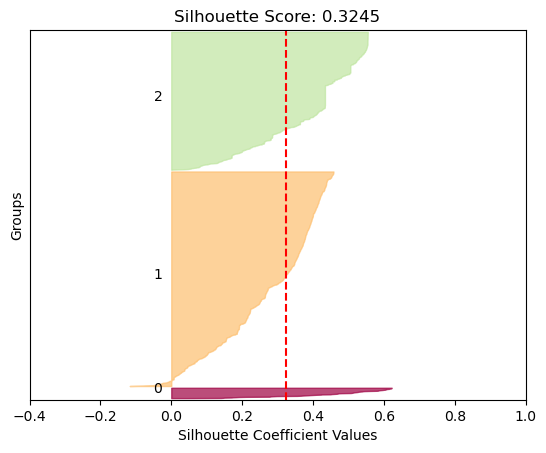

In [1404]:
# silhouette coefficient plot
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(data_sc, y_kmeans)
sample_silhouette_values = silhouette_samples(data_sc, y_kmeans)

y_lower = 10
fig, ax = plt.subplots()
ax.set_xlim([-.4, 1])
ax.set_ylim([0, len(data_sc) + (k + 1) * 10])

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.colormaps.get_cmap("Spectral")(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Groups")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_title(f"Silhouette Score: {silhouette_avg:.4f}")
plt.show()

PCA Explained Variance Ratio Sum: 0.4379


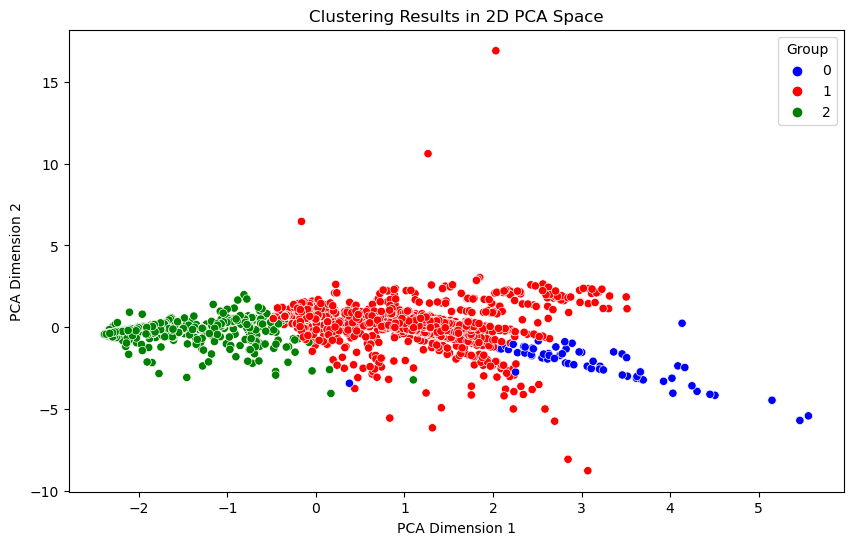

In [1465]:
# cluster distribution in PCA 2 dimensions
pca_2 = PCA(n_components=2)
data_pca = pd.DataFrame(pca_2.fit_transform(data_sc), columns=['D1','D2'], index=data.index)
print("PCA Explained Variance Ratio Sum:", pca_2.explained_variance_ratio_.sum().round(4))

data_pca['Group'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca['D1'], y=data_pca['D2'], hue='Group', data=data_pca, palette={0:'blue',1:'red',2:'green'})
plt.title('Clustering Results in 2D PCA Space')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

## Model Evaluation

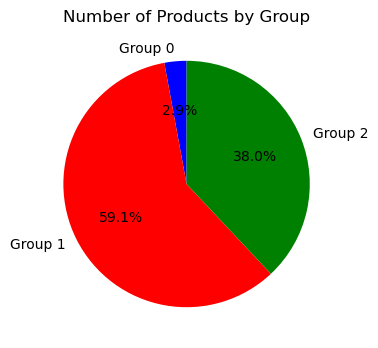

In [1482]:
plt.figure(figsize=(4,4))
plt.pie(data_grp['Group'].value_counts().sort_index(), labels=['Group 0','Group 1','Group 2'],
        colors=['blue','red','green'], startangle=90, autopct='%1.1f%%')
plt.title("Number of Products by Group")
plt.show()

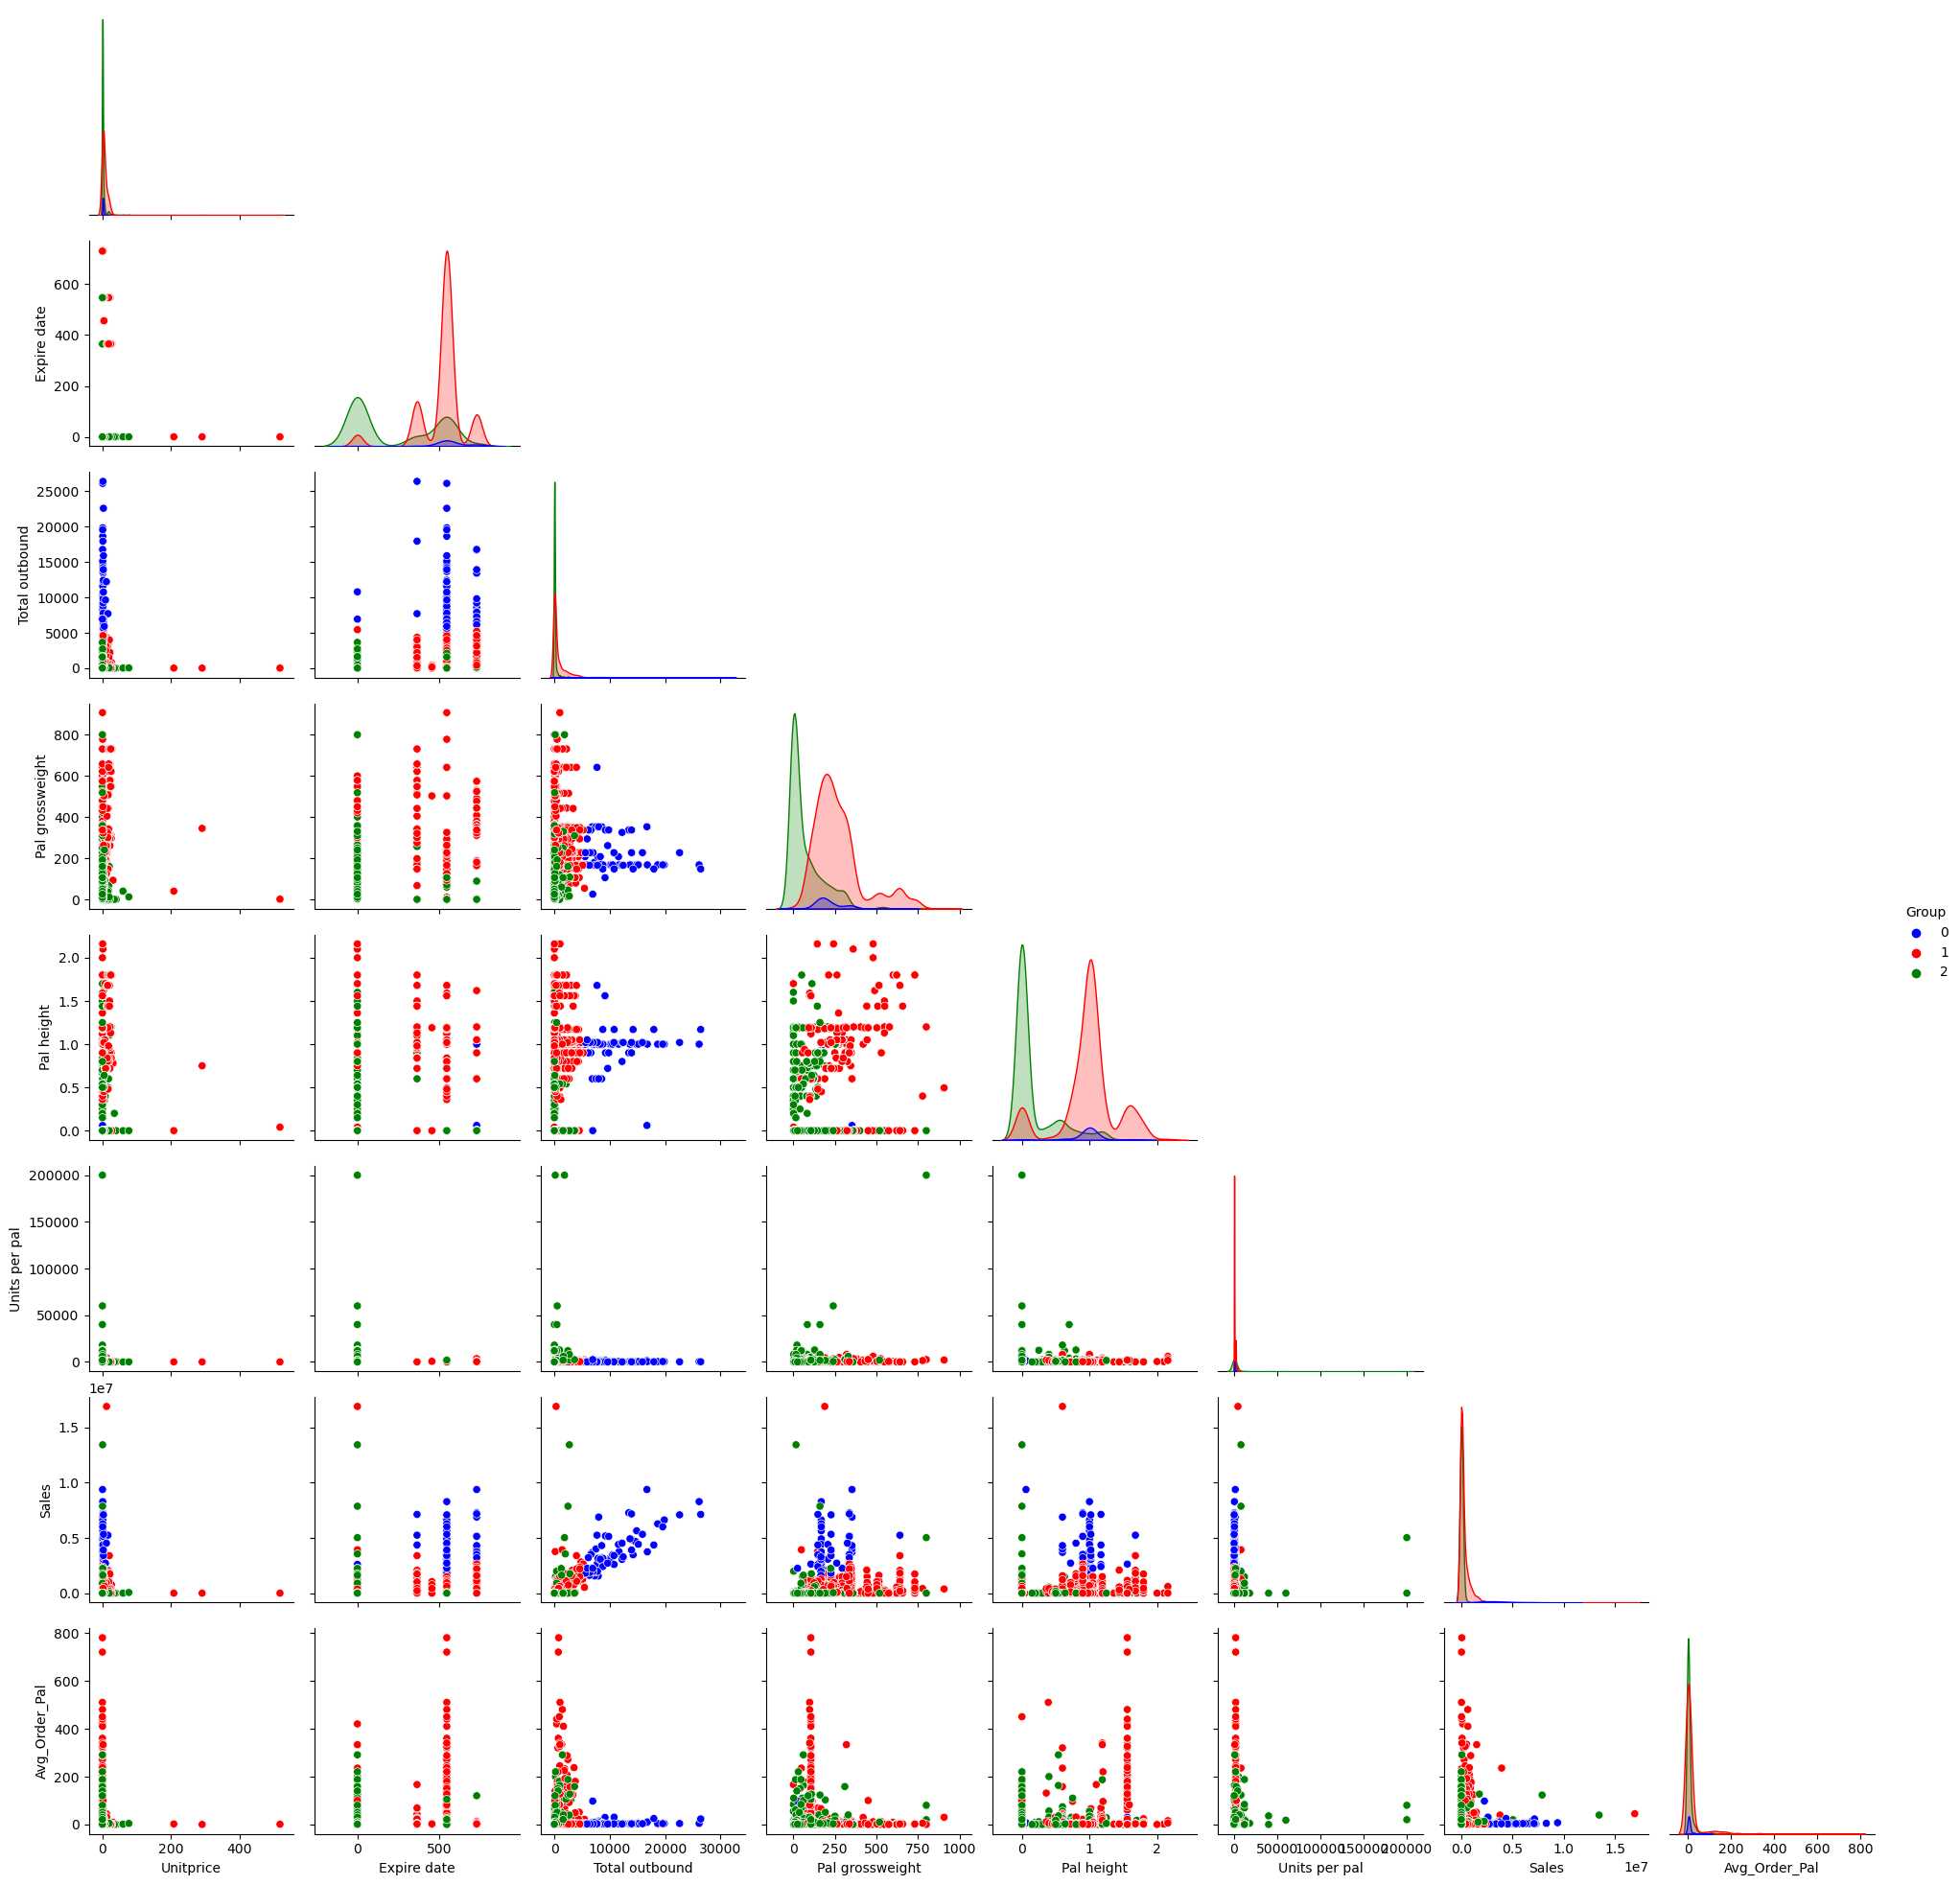

In [1405]:
sns.pairplot(data_grp, hue='Group', corner=True, palette={0:'blue',1:'red',2:'green'})

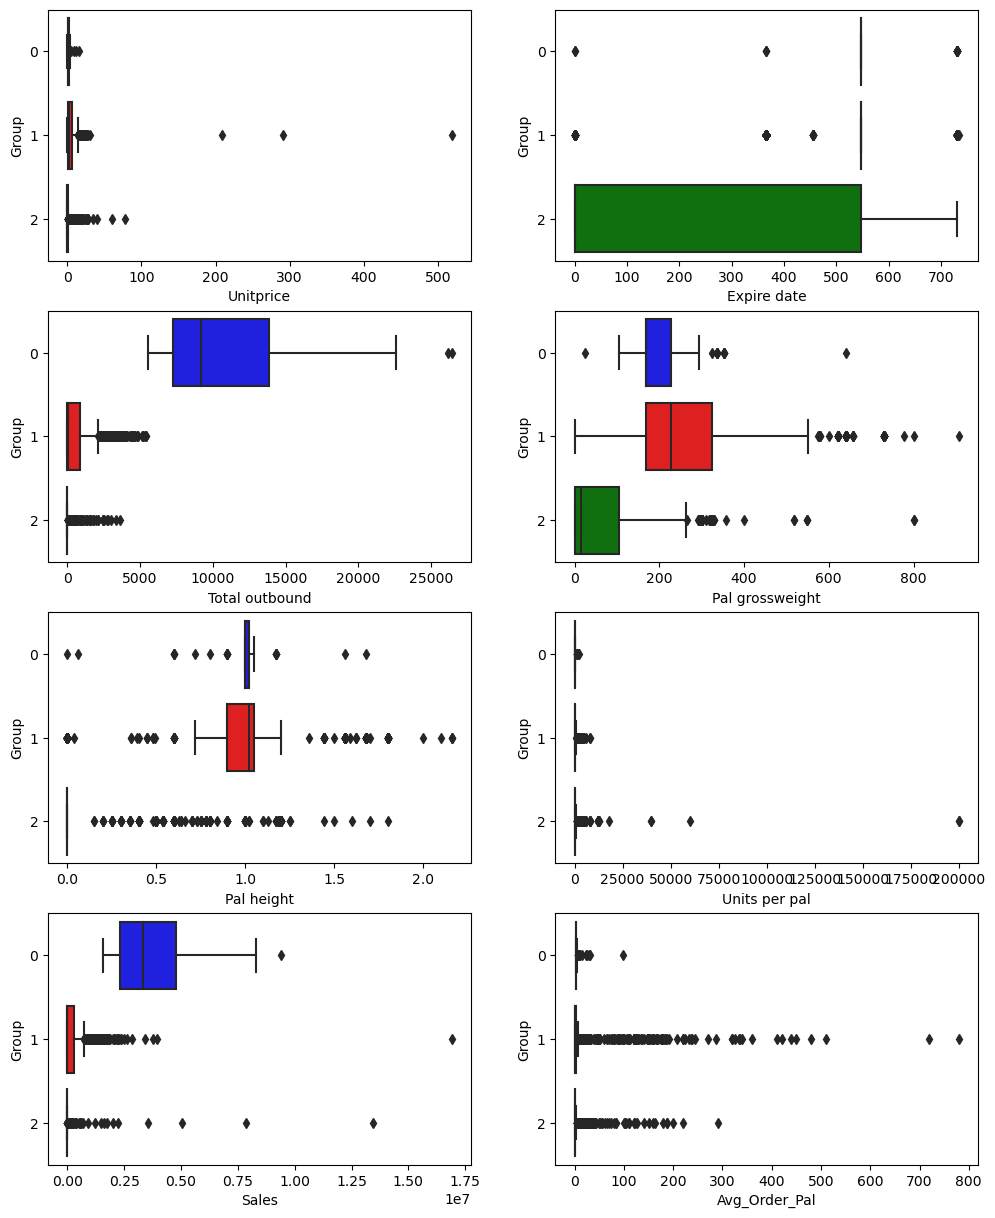

In [1426]:
plt.figure(figsize=(12,15))
for i, col in enumerate(data_grp.drop(columns='Group')):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=data_grp, x=col, y='Group', orient='h', palette={0:'blue',1:'red',2:'green'})

In [1407]:
def kruskal_wallis(c1, c2, alpha=.05):
    from scipy.stats import kruskal
    res = []
    for col in c1:
        p_val = kruskal(c1[col][c2==0],c1[col][c2==1],c1[col][c2==2])[1]
        if p_val < alpha: corr="Different"
        else: corr="Same"
        entry = {'Var1':col, 'Var2':c2.name, 'Median':corr, 'alpha':alpha, 'p_val':p_val}
        res.append(entry)
    return pd.DataFrame(res)
kruskal_wallis(data_grp.drop(columns=['Group','Expire date']), data_grp['Group'])

,Var1,Var2,Median,alpha,p_val
0,Unitprice,Group,Different,0.05,7.788725e-172
1,Total outbound,Group,Different,0.05,8.197392e-124
2,Pal grossweight,Group,Different,0.05,5.936897e-221
3,Pal height,Group,Different,0.05,8.538948e-242
4,Units per pal,Group,Different,0.05,2.252691e-43
5,Sales,Group,Different,0.05,1.361748e-201
6,Avg_Order_Pal,Group,Different,0.05,5.543121e-57


In [1408]:
data_grp.groupby('Group').mean().T

Group,0,1,2
Unitprice,1.942485e+00,6.066021,1.652232
Expire date,5.609697e+02,516.268003,234.180139
Total outbound,1.089348e+04,638.862435,101.650115
Pal grossweight,2.170884e+02,270.598190,70.306829
Pal height,9.669697e-01,0.986092,0.163072
Units per pal,4.118485e+02,462.342984,1237.841801
Sales,3.822497e+06,252044.361872,56525.047416
Avg_Order_Pal,6.445794e+00,15.732906,6.990778


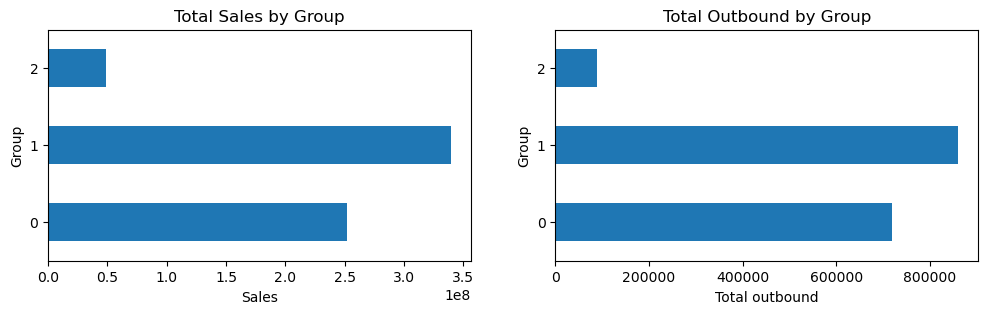

In [1477]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
data_grp.groupby('Group')['Sales'].sum().plot(kind='barh')
plt.xlabel("Sales")
plt.title("Total Sales by Group")
plt.subplot(1,2,2)
data_grp.groupby('Group')['Total outbound'].sum().plot(kind='barh')
plt.xlabel("Total outbound")
plt.title("Total Outbound by Group")
plt.show()

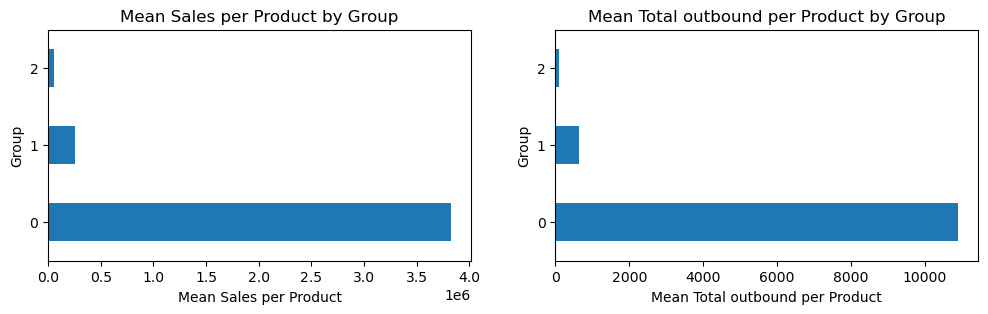

In [1481]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
data_grp.groupby('Group')['Sales'].mean().plot(kind='barh')
plt.xlabel("Mean Sales per Product")
plt.title("Mean Sales per Product by Group")
plt.subplot(1,2,2)
data_grp.groupby('Group')['Total outbound'].mean().plot(kind='barh')
plt.xlabel("Mean Total outbound per Product")
plt.title("Mean Total outbound per Product by Group")
plt.show()

The grouping was based on total 8 different attributes of the products. Some clear trends can be seen from the grouping:

Group 0 - high sales value, high outbound per product, high expire date, low unit price, 66 products in this group  
Group 1 - high sales value, low outbound per product, high expire date, high unit price, 1347 products in this group  
Group 2 - low sales value, low outbound per product, low expire date, low unit price, 866 products in this group

## Conclusion

Inventory products were assigned into 3 different clustering groups by using K-nearest neighbors algorithm, using handling and turnover features that are essential in an classical ABC inventory analysis. This segmentation provides a foundation for tailored marketing strategies and product offerings.

Group 0 is similar to class A category in ABC analysis, where a few product contributes to large proportion of sales with high turnover rate. Customers tend to purchase these products in larger quantities and may be interested in bulk or wholesale deals.  
Group 1 is similar to class B category, where most of the products fall into and contributes to some proportion of sales. Customers for these products are likely to be price-sensitive and prefer lower-priced items.  
Group 2 is similar to class C category, where the products are not contributing much to sales and have low usage in general.

Our clustering analysis empowers data-driven decision-making. By understanding customer preferences and behaviors within each cluster, we can optimize marketing campaigns, enhance customer experiences, and streamline inventory management.

Overall, this project's success lies in its ability to extract actionable insights from data, enabling us to make informed decisions that align with customer needs and preferences.